In [2]:
from mpl_toolkits.mplot3d import Axes3D
import copy as copylib
#from progressbar import *
import pandas as pd
import numpy
#%pylab
from matplotlib import pylab
import matplotlib.pyplot as plt
plt.style.use("dark_background")
from pylab import *
pylab.rcParams['figure.figsize'] = (16, 6)
numpy.random.seed(0)

In [3]:
dataframe =  pd.read_csv('ir_data.csv').set_index('time') / 100 # Convert interest rates to %
pd.options.display.max_rows = 10
display(dataframe)

KeyError: "None of ['time'] are in the columns"

In [4]:
dataframe =  pd.read_csv('ir_data.csv')

In [6]:
dataframe.head()

,Period,years0.5,years1,years1.5,years2,years2.5,years3,years3.5,years4,years4.5,...,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60
0,04 Jan 05,4.51,4.27,4.27,4.34,4.39,4.43,4.46,4.48,4.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,05 Jan 05,4.51,4.27,4.27,4.34,4.40,4.44,4.47,4.49,4.51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06 Jan 05,4.50,4.23,4.22,4.29,4.35,4.40,4.44,4.47,4.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,07 Jan 05,4.49,4.23,4.23,4.29,4.36,4.40,4.44,4.46,4.48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10 Jan 05,4.49,4.22,4.21,4.28,4.35,4.39,4.43,4.46,4.48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
import numpy as np

# Sample Data
age = np.array([25, 30, 35, 40, 45])
height = np.array([175, 180, 185, 165, 170])
weight = np.array([70, 80, 75, 65, 72])

# Standardizing the data
age_std = (age - np.mean(age)) / np.std(age)
height_std = (height - np.mean(height)) / np.std(height)
weight_std = (weight - np.mean(weight)) / np.std(weight)

# Creating a matrix of the standardized data
X_std = np.column_stack((age_std, height_std, weight_std))

# Calculating the covariance matrix
cov_matrix = np.cov(X_std.T)

# Eigendecomposition
eigen_vals, eigen_vecs = np.linalg.eig(cov_matrix)

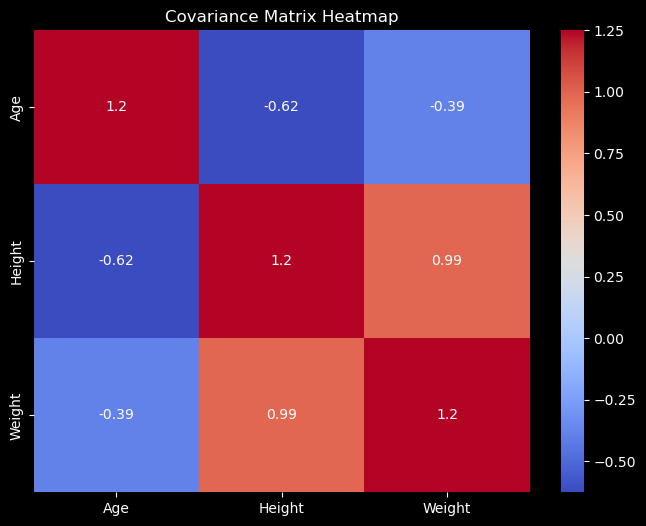

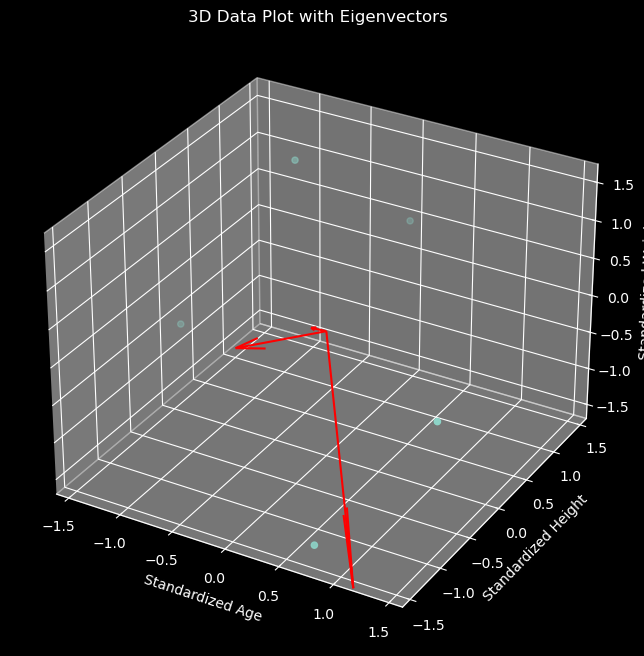

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Covariance Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', xticklabels=['Age', 'Height', 'Weight'], yticklabels=['Age', 'Height', 'Weight'])
plt.title('Covariance Matrix Heatmap')
plt.show()

# 3D Data Plot with Eigenvectors
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(age_std, height_std, weight_std)

# Adding eigenvectors to the 3D plot
for i in range(len(eigen_vals)):
    vec = eigen_vecs[:,i] * eigen_vals[i]
    ax.quiver(0, 0, 0, vec[0], vec[1], vec[2], color='r')

ax.set_xlabel('Standardized Age')
ax.set_ylabel('Standardized Height')
ax.set_zlabel('Standardized Weight')
plt.title('3D Data Plot with Eigenvectors')
plt.show()

# Eigendecomposition
eigen_vals, eigen_vecs = np.linalg.eig(cov_matrix)

In [18]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/fenago/datasets/main/protein.csv"
food_data = pd.read_csv(url)

scaler = StandardScaler()
food_scaled = scaler.fit_transform(food_data.iloc[:, 1:])

pca = PCA()
principal_components = pca.fit_transform(food_scaled)

loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i}' for i in range(1, len(food_data.columns))], index=food_data.columns[1:])
print(loadings)

                 PC1       PC2       PC3       PC4       PC5       PC6  \
 RedMeat   -0.302609 -0.056252  0.297580  0.646477  0.322160 -0.459870   
 WhiteMeat -0.310556 -0.236853 -0.623897 -0.036992 -0.300165 -0.121007   
 Eggs      -0.426679 -0.035336 -0.181528  0.313164  0.079110  0.361249   
 Milk      -0.377727 -0.184589  0.385658 -0.003318 -0.200414  0.618438   
 Fish      -0.135650  0.646820  0.321274 -0.215955 -0.290031 -0.136791   
 Cereals    0.437743 -0.233485 -0.095918 -0.006204  0.238168  0.080758   
 Starch    -0.297248  0.352826 -0.242975 -0.336685  0.735973  0.147667   
 Nuts       0.420334  0.143311  0.054388  0.330288  0.150537  0.447010   
 Fr&Veg     0.110420  0.536190 -0.407556  0.462056 -0.233517  0.118550   

                 PC7       PC8       PC9  
 RedMeat    0.150334  0.019858 -0.246000  
 WhiteMeat -0.019664  0.027876 -0.592397  
 Eggs      -0.443272  0.491200  0.333386  
 Milk       0.462095 -0.081422 -0.178084  
 Fish      -0.106394  0.448732 -0.312826  
 

In [24]:
url

'https://raw.githubusercontent.com/fenago/datasets/main/protein.csv'

In [19]:
# Assuming loadings is a pandas DataFrame with PCA loadings as given above
import pandas as pd

# Set a threshold for which features to extract
threshold = 0.3

# Find features with loadings above the threshold for each principal component
important_features = {}
for column in loadings.columns:
    important_features[column] = loadings.index[loadings[column].abs() > threshold].tolist()

# Now 'important_features' dictionary contains the important features for each PC
for pc, features in important_features.items():
    print(f"{pc}: {', '.join(features)}")

PC1:  RedMeat,  WhiteMeat,  Eggs,  Milk,  Cereals,  Nuts
PC2:  Fish,  Starch,  Fr&Veg
PC3:  WhiteMeat,  Milk,  Fish,  Fr&Veg
PC4:  RedMeat,  Eggs,  Starch,  Nuts,  Fr&Veg
PC5:  RedMeat,  WhiteMeat,  Starch
PC6:  RedMeat,  Eggs,  Milk,  Nuts
PC7:  Eggs,  Milk,  Cereals,  Nuts,  Fr&Veg
PC8:  Eggs,  Fish,  Cereals
PC9:  WhiteMeat,  Eggs,  Fish,  Nuts


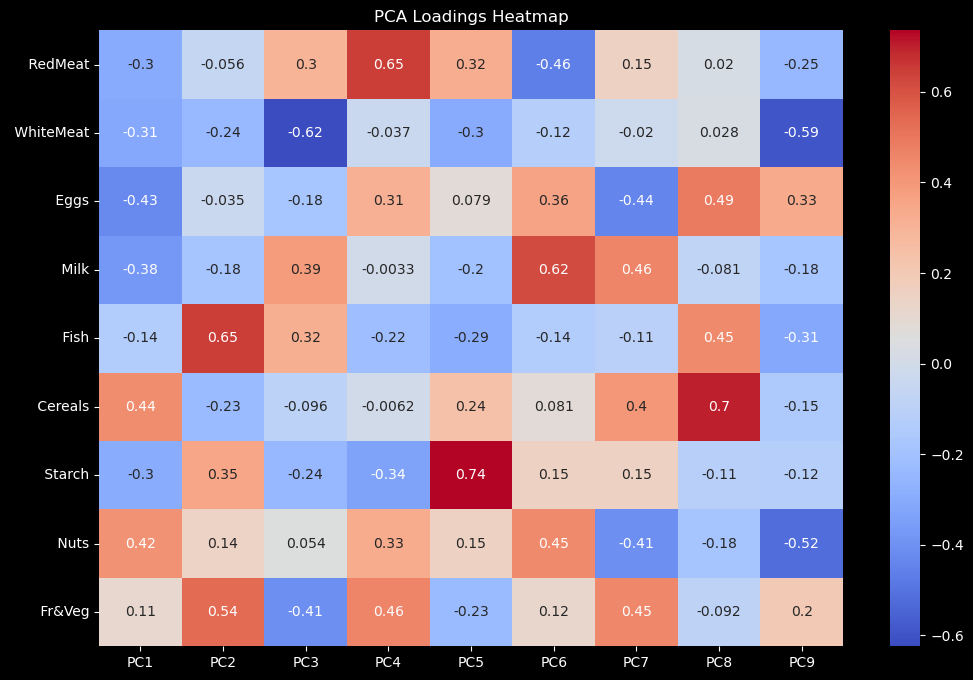

In [20]:
import seaborn as sns

# Create a heatmap for the loadings
plt.figure(figsize=(12, 8))
sns.heatmap(loadings, annot=True, cmap='coolwarm')
plt.title('PCA Loadings Heatmap')
plt.show()

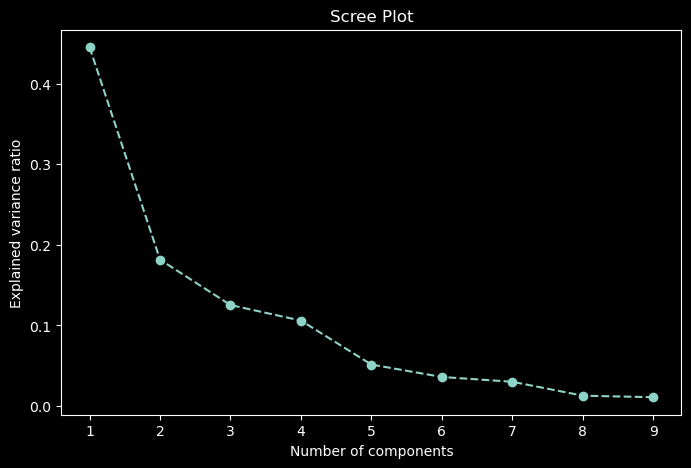

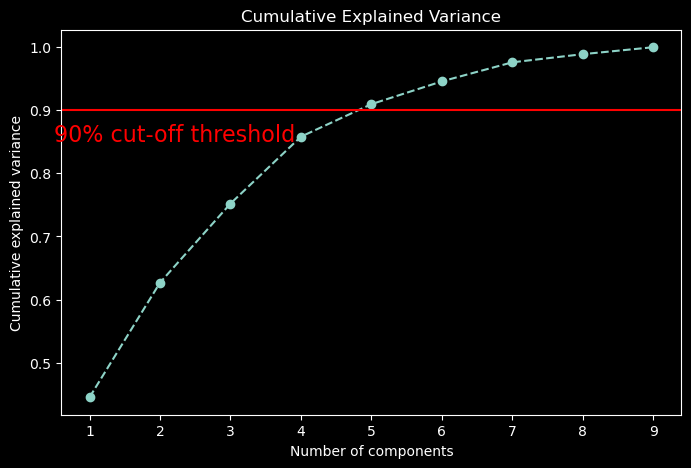

In [21]:
import numpy as np
# Create a scree plot
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.show()

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Create a plot for cumulative explained variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.axhline(y=0.9, color='r', linestyle='-')  # 90% variance line
plt.text(0.5, 0.85, '90% cut-off threshold', color = 'red', fontsize=16)
plt.show()